# Modèle autorégressif (AR)
---
## 1.1 Formulation mathématique

Un modèle autorégressif AR d'ordre $p$, noté $\text{AR}(p)$ est un modèle de régression qui évalue la valeur d'une famillle de variables aléatoires $X_t$ i.i.d en se basant sur la valeur de ses valeurs passées. Le modèle autorégressif $AR(p)$ se modélise sous la forme suivante :

$$
X_t = \sum_{i = 1}^{p}\phi_{i}X_{t-i} + c + \epsilon_{t}
$$

Avec :

* $X_{t-i}$ : valeurs de la série à l'instant $t - i$ supposées connues. Entre autres, $X = (X_{1}, \dots ,X_{t - 1}) \in \mathbb{R^{p}}$
* $(\phi_{i})_{i \in \mathbb{N}} \in \mathbb{R}$ sont les paramètres du modèle
* $c \in \mathbb{R}$ une constante
* $\epsilon_{t} \in \mathbb{R}$ un bruit
 
En d'autres termes, on prédit la valeur $X_{t}$ en fonction des valeurs précédentes $(X_{t-i})_{i < p}$ supposées connues. L'objectif est de déterminer les coefficients $(\phi_{i})_{i \in \mathbb{N}}$ de telle sorte à trouver l'estimateur $\hat{X_{t}}$ de $X_{t}$ qui minimise cette quantité :

$$
\min_{(\phi_{i})_{i \in \mathbb{N}}} \mathbb{E}[X_t - \hat{X}_t] = \min_{(\phi_{i})_{i \in \mathbb{N}}} \mathbb{E}[X_t - \sum_{i=1}^{p}\phi_{i}X_{t-i}]
$$

## 1.2 Solution
### 1.2.1 Les équations de Yule-Walker

On peut trouver les $(\hat{\phi_{i}})_{i \in \mathbb{N}}$ grâce aux coefficients d'autocovariance estimés $(\hat{\gamma_{X}}(i))_{i \in \mathbb{N}}$ définis par :

1. Si le signal de longueur $T$ n'est pas centré, i.e. $\mathbb{E}(X) \neq 0$:
$$
\hat{\gamma_{X}}(i) = \frac{1}{T}\sum_{t=i+1}^{T}(X_{t} - \bar{X})(X_{t-i} - \bar{X})
$$

2. Si le signal de longueur $T$ est centré, i.e. $\mathbb{E}(X) = 0$ :

$$
\hat{\gamma_{X}}(i) = \frac{1}{T}\sum_{t=i+1}^{T}X_{t}X_{t-i}
$$

Avec $\bar{X}$ la moyenne empirique du signal $\bar{X} = \frac{1}{T}\sum_{t=1}^{T}X_{t}$

Les **équations de Yule-Walker** sont de la forme :

1. Calcul des $(\hat{\phi_{i}})_{i \in \mathbb{N}}$
$$
    \begin{bmatrix}
        \hat{\gamma_{X}}(1) \\
        \hat{\gamma_{X}}(2) \\
        \vdots \\
        \hat{\gamma_{X}}(p)
    \end{bmatrix} =
    \begin{bmatrix}
    \hat{\gamma_{X}}(0) & \hat{\gamma_{X}}(1) & \dots & \hat{\gamma_{X}}(p-1) \\
    \hat{\gamma_{X}}(1) & \hat{\gamma_{X}}(0) & \dots & \hat{\gamma_{X}}(p-2) \\
    \vdots & \vdots & \vdots & \vdots \\
    \hat{\gamma_{X}}(p-1) & \hat{\gamma_{X}}(p-2)& \dots & \hat{\gamma_{X}}(0) \\
    \end{bmatrix}
    \begin{bmatrix}
    \hat{\phi_{1}} \\
    \hat{\phi_{2}} \\
    \vdots \\
    \hat{\phi_{p}} \\
    \end{bmatrix}
$$

La matrice dans l'équation est appelée matrice d'autocovariance. C'est une matrice de type Toeplitz, ce qui permet d'utiliser l'algorithme de Levinson-Durbin pour la résolution du système une fois les coefficients d'autocovariance estimés.

2. Calcul de $Var(\epsilon_{t})$ :

$$
Var(\epsilon_{t}) = \sigma^{2} = \hat{\gamma_{X}}(0) - \sum_{i=1}^{p}\hat{\phi_{i}}\hat{\gamma_{X}}(i)
$$

---
#### Interlude sur l'algorithme de Levinson-Durbin

Au lieu de de résoudre le système en inversant la matrice d'autocovariance, Levinson-Durbin propose de construire les coefficients AR $(\hat{\phi_{i}})_{i \in \mathbb{N}}$ de manière récursive grâce à des coefficients $\alpha_{j}^{(i)}$ tel que :

$$
\alpha_{i}^{(i)} = \alpha_{i}= \hat{\phi_{i}}
$$

Attention : pour $j \neq i,  \alpha_{j}^{(i)} \neq \hat{\phi_{i}}$. On trouve donc les $(\hat{\phi_{i}})_{i \in \mathbb{N}}$ à l'aide des $(\alpha_{j}^{(i)})_{i,j \in \mathbb{N}}$ grâce à la relation suivante :

$$
\alpha_{i} = \frac{\hat{\gamma_{X}}(i) - \sum_{j=1}^{i-1} \alpha_{j}^{(i-1)}\hat{\gamma_{X}}(i-j)}{E_{i-1}}
$$

Avec les relations de récurrence suivantes :

$$
\alpha_{j}^{(i)} = \alpha_{j}^{(i-1)} - \alpha_{i}\alpha_{i-j}^{(i-1)} \textcolor{white}{.....} (1)
$$
Pour  $i \in ⟦1; p⟧, j \in ⟦1; i-1⟧$ avec $\alpha_{i}^{(i)} = \alpha_{i}$ et $\alpha_{1}^{(1)} = \frac{\hat{\gamma_{X}}(1)}{\hat{\gamma_{X}}(0)}$
$$
E_{i} = E_{i-1}(1-\alpha_{i}^{2}) \textcolor{white}{.....} (2)
$$
Pour $i \in ⟦1; p⟧$ avec $E_{1} = \hat{\gamma_{X}}(0)(1-(\alpha_{1}^{(1)})^{2})$ 

On a finalement que les $(\alpha_{i}^{(p)})_{i \in \mathbb{N}}$ sont les $(\hat{\phi_{i}})_{i \in \mathbb{N}}$ et $E_{p}$ est l'estimation du bruit blanc $\sigma^{2}$


# Modèle à moyenne mobile (MA)
---
## 1.1 Formulation mathématique

Un modèle autorégressif MA d'ordre $q$, noté $\text{MA}(q)$ est un modèle de régression qui évalue la valeur d'une famillle de variables aléatoires $X_t$ i.i.d en se basant sur la valeur de ses valeurs passées. Le modèle autorégressif $MA(q)$ se modélise sous la forme suivante :

$$
X_t = \sum_{i = 1}^{p}\theta_{i}\epsilon_{t-i} + \mu + \epsilon_{t}
$$

Avec :

* $X_{t-i}$ : valeurs de la série à l'instant $t - i$ supposées connues. Entre autres, $X = (X_{1}, \dots ,X_{t - 1}) \in \mathbb{R^{p}}$
* $(\theta_{i})_{i \in \mathbb{N}} \in \mathbb{R}$ sont les paramètres du modèle
* $\mu = \mathbb{E}[X_t] \in \mathbb{R}$ est la moyenne de la série
* $\epsilon_{t} \in \mathbb{R}$ un bruit
 
En d'autres termes, on prédit la valeur $X_{t}$ en fonction des valeurs précédentes $(X_{t-i})_{i < p}$ supposées connues. L'objectif est de déterminer les coefficients $(\phi_{i})_{i \in \mathbb{N}}$ de telle sorte à trouver l'estimateur $\hat{X_{t}}$ de $X_{t}$ qui minimise cette quantité :

$$
\min_{(\phi_{i})_{i \in \mathbb{N}}} \mathbb{E}[X_t - \hat{X}_t] = \min_{(\phi_{i})_{i \in \mathbb{N}}} \mathbb{E}[X_t - \sum_{i=1}^{p}\phi_{i}X_{t-i}]
$$

## 1.2 Solution

Modèle Autorégressif Intégré à Moyenne Mobile (ARIMA)
---
## 1.1 Formulation mathématique

Le modèle ARIMA est la combinaison linéaire d'un processus autorégressif (AR), d'une composante intégrée (I) et d'un processus à Moyenne Mobile (MA).

$$
ARIMA(p,d,q) = AR(p) + I(d) + MA(q)
$$

$$
X_t = \sum_{i = 1}^{p}\theta_{i}\epsilon_{t-i} + \mu + \epsilon_{t}
$$

Avec :

* $X_{t-i}$ : valeurs de la série à l'instant $t - i$ supposées connues. Entre autres, $X = (X_{t-p}, \dots ,X_{t - 1}) \in \mathbb{R^{p}}$
* $(\theta_{i})_{i \in \mathbb{N}} \in \mathbb{R}$ sont les paramètres du modèle
* $\mu = \mathbb{E}[X_t] \in \mathbb{R}$ est la moyenne de la série
* $\epsilon_{t} \in \mathbb{R}$ un bruit
 
En d'autres termes, on prédit la valeur $X_{t}$ en fonction des valeurs précédentes $(X_{1})_{i < p}$ supposées connues. L'objectif est de déterminer les coefficients $(\phi_{i})_{i \in \mathbb{N}}$ de telle sorte à trouver l'estimateur $\hat{X_{t}}$ de $X_{t}$ qui minimise cette quantité :

$$
\min_{(\phi_{i})_{i \in \mathbb{N}}} \mathbb{E}[X_t - \hat{X}_t] = \min_{(\phi_{i})_{i \in \mathbb{N}}} \mathbb{E}[X_t - \sum_{i=1}^{p}\phi_{i}X_{t-i}]
$$

## 1.2 Solution

Modèle Autorégressif Intégré à Moyenne Mobile avec composante Saisonnière (SARIMA)
---
## 1.1 Formulation mathématique

$$
Y_t = SARIMA(p,d,q)(P,D,Q)_s =
$$

Modèle Autorégressif Intégré à Moyenne Mobile (SARIMAX)
---
## 1.1 Formulation mathématique

$$
Y_t = SARIMA(p,d,q)(P,D,Q)_s + \beta X_t
$$

* $\beta \in \mahtbb{R}$ : coefficients associés aux variables exogènes
* $X_t = (X_1, \dots, X_J) \in \mathcal{M}_{T,J}(\mathbb{R})$ : variables exogènes


## 1.3 Métriques utilisées pour les modèles 


* Mean Absolute Percentage Error (MAPE)
* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)
* Lag 1 Autocorrelation of Error (ACF1)
* Correlation between the Actual and the Forecast (corr)
* Min-Max Error (minmax)


## 2. Un exemple en Python
---
#### 2.1 Import des librairies

In [58]:
import statsmodels.api as sm
import numpy as np
import math
from numpy import log
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import tqdm

# Hyperparameter tunning
import pmdarima as pm

# Training
from sklearn.model_selection import TimeSeriesSplit

# Models
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style('darkgrid')

#### 2.2 Initialisation / import des données

In [59]:
df = pd.read_csv("src/data/dataset_sarimax.csv")
df["date"] = pd.to_datetime(df["date"])

In [60]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [61]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 204    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ value     │    0 │      0 │   10.69 │   5.957 │   2.815 │   5.844 │   9.319 │   14.29 │   29.67 │  █▅▄▂▁   │  │
│ └───────────┴──────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column         ┃ NA     ┃ NA %       ┃ first                 ┃ last                  ┃ frequency           ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date           │      0 │          0 │      1991-07-01       │      2008-06-01       │ MS                  │  │
│ └────────────────┴────────┴────────────┴───────────────────────┴───────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

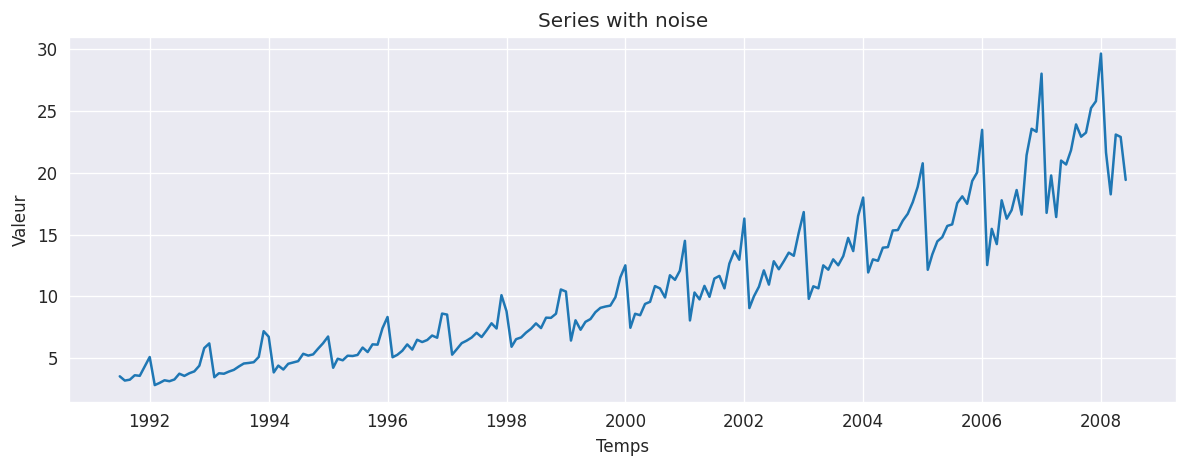

In [62]:
plt.figure(figsize=(10,4))
sns.lineplot(
    df,
    x="date",
    y="value"
)
plt.title("Series with noise")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.tight_layout()
plt.show()

#### 2.3 Tendance et saisonnalité

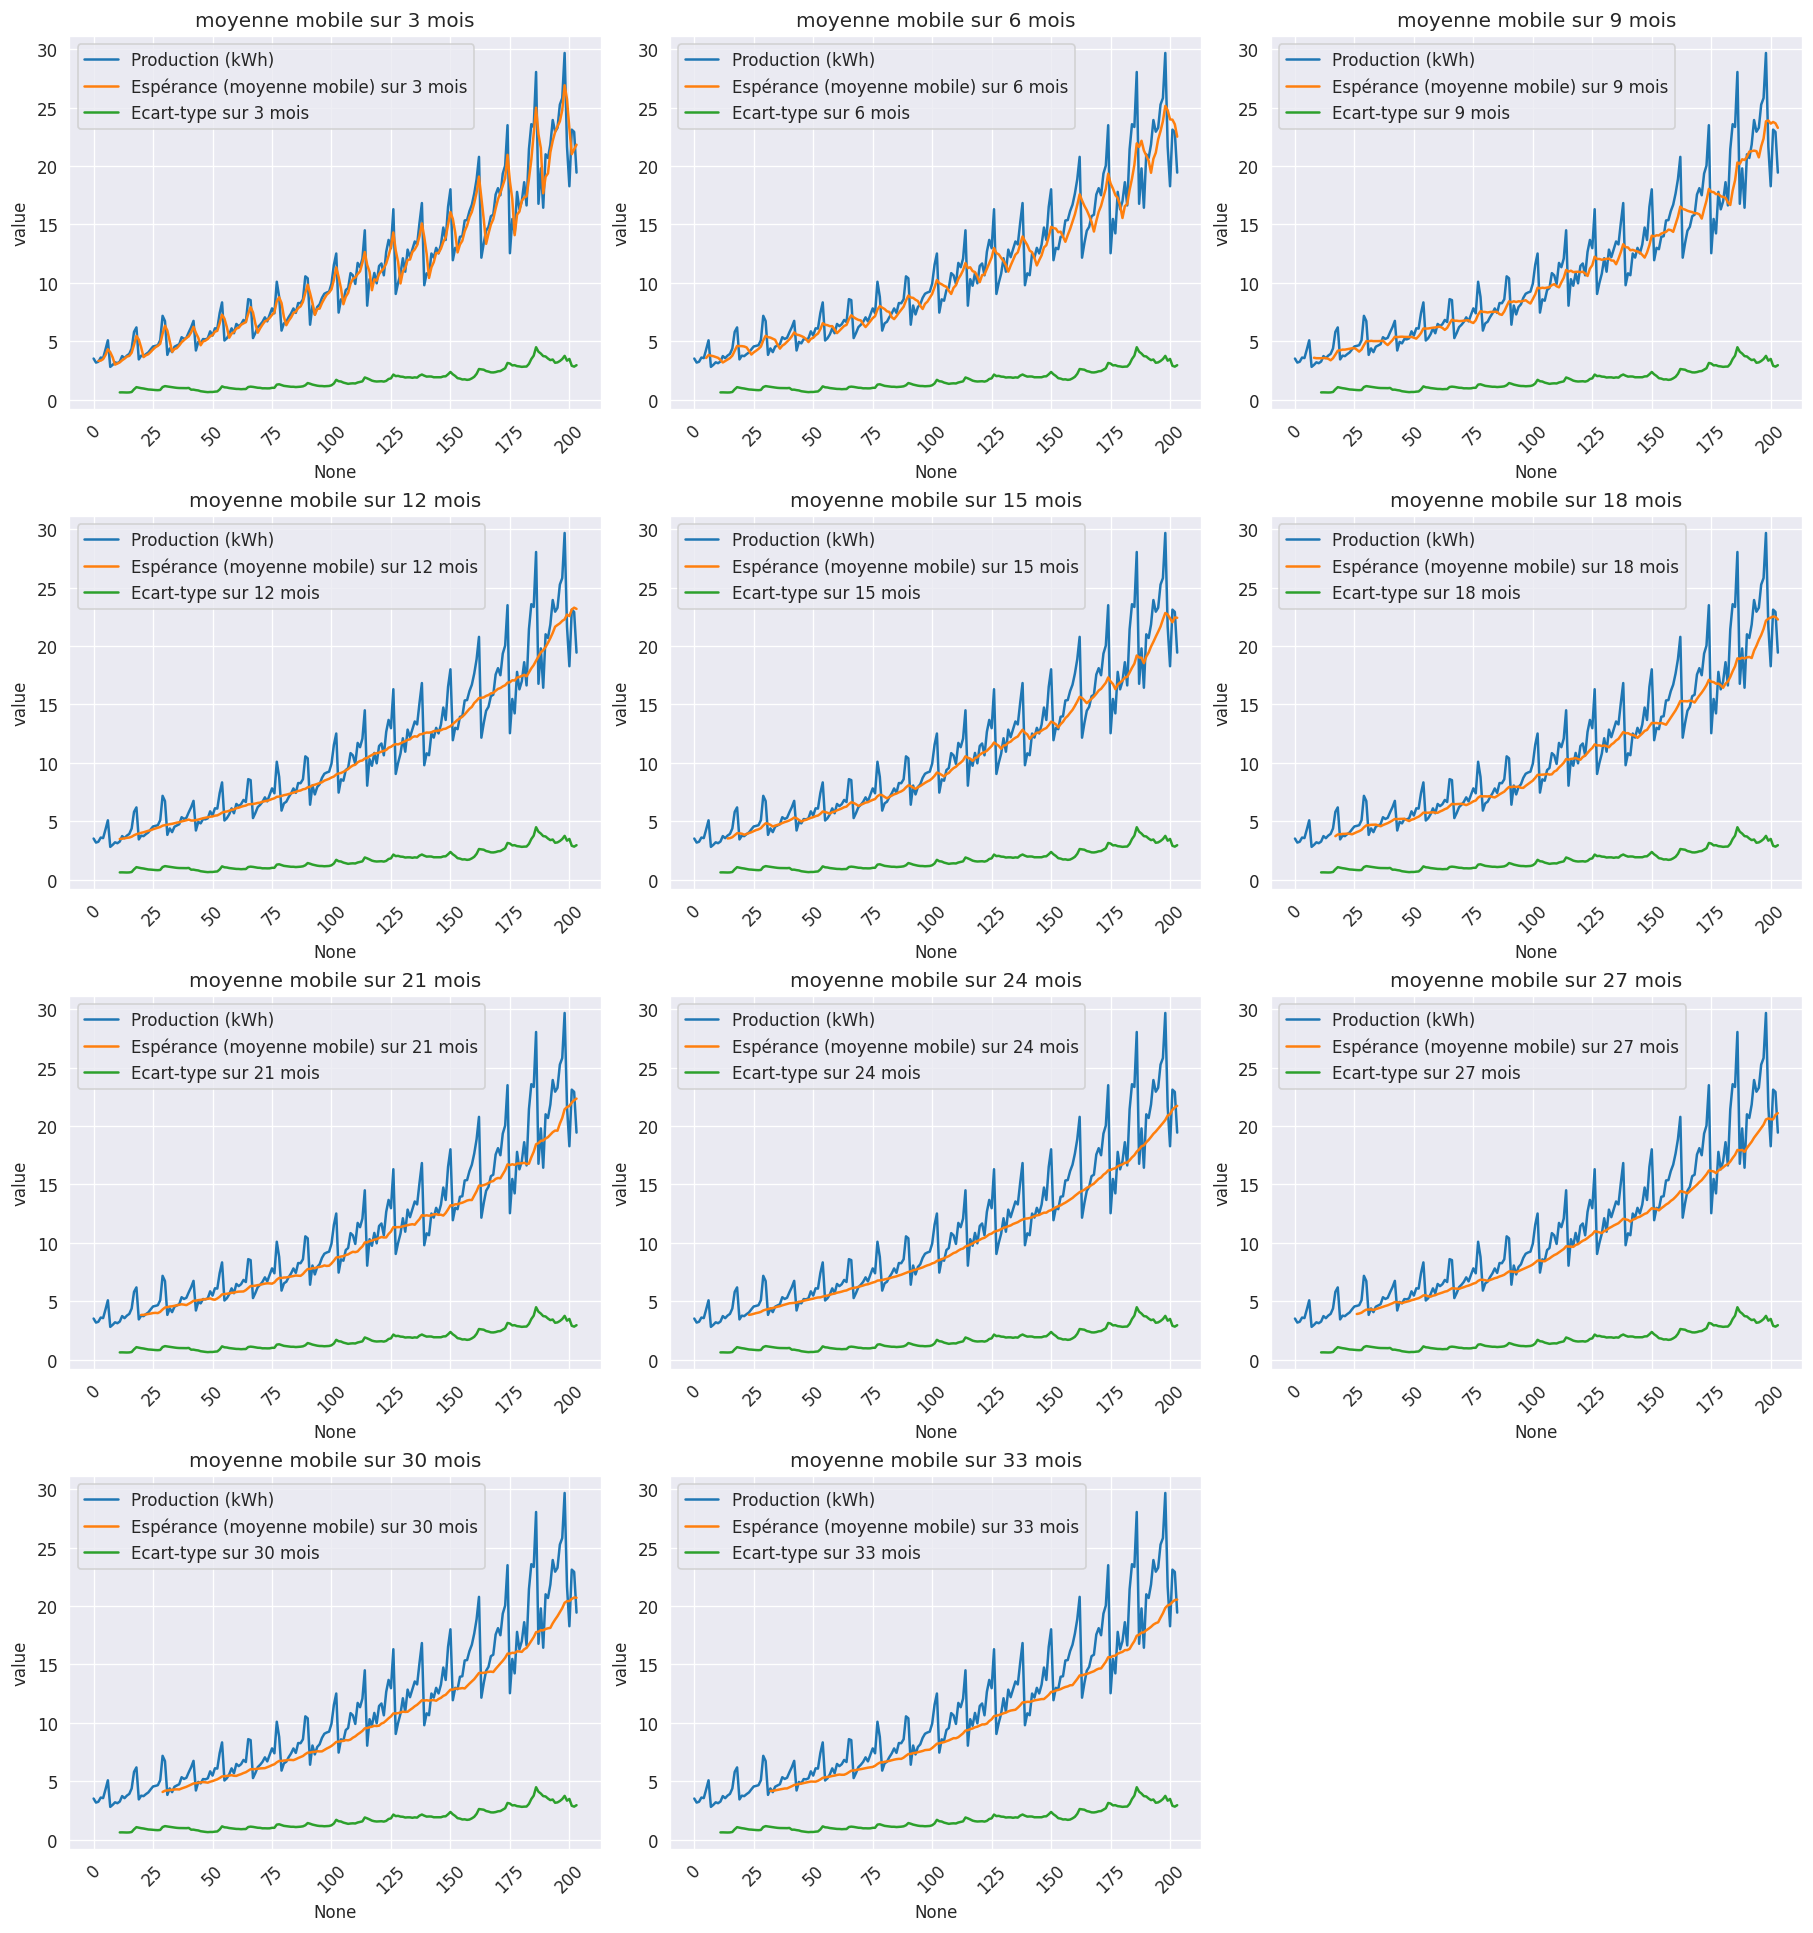

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [63]:
target = 'value'

seasonnality = range(3,39,3) # Moyennes mobiles sur 3 à 36 mois par pas de 3 mois pour la détection de saisonnalité
cols = 3
rows = math.ceil(len(seasonnality) / cols) 

fig, axes = plt.subplots(
    rows,
    cols,
    figsize = (5*cols, 4*rows),
    constrained_layout=True
)
axes = axes.flatten()

for i, window in enumerate(range(3,36,3)):
    df['rolling_mean'] = df[target].rolling(window=window).mean() # Moyenne locale, lissage du signal sur 12 mois
    df['rolling_std'] = df[target].rolling(window=12).std() # std (Standart Deviation) sur 12 mois
    
    plt.figure(figsize = (12,6))
    sns.lineplot(
        df,
        x = df.index,
        y = df[target],
        label="Production (kWh)",
        ax=axes[i]
    )
    
    sns.lineplot(
        df,
        x = df.index,
        y = "rolling_mean",
        label=f"Espérance (moyenne mobile) sur {window} mois",
        ax=axes[i]
    )
    
    sns.lineplot(
        df,
        x = df.index,
        y = "rolling_std",
        label=f"Ecart-type sur {window} mois",
        ax=axes[i]
    )

    axes[i].set_title(f"moyenne mobile sur {window} mois")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)): # Retire les axes inutiles
    fig.delaxes(axes[j])

plt.show()

#### 2.3 Réglage de l'hyperparamètre $d$

Le paramètre $d$ est le nombre de différenciations qu'il faut appliquer à la série pour la rendr stationnaire. Une différenciation est un opérateur noté $\Delta$ tel que :

$$
\Delta X_t = X_{t} - X_{t-1} 
$$

On peut répéter cette opération autant de fois que l'on veut tant qu'on a la connaissance du passé. On définit donc la $k$-ième différenciation telle que :

$$
\Delta^k X_t = X_{t-k} - X_{t-k-1}, \quad k < t 
$$

##### AD Fuller test

Le processus AR requiert que la série soit staionnaire. On réalise alors le test Augmenté de Dicker-Fuller (ADF test) pour vérifier cette stationnarité. Le test ADF est un test de racine unitaire, i.e. appartient à une famille de tests qui permet de vérifier la stationnarité d'une série temporelle. Une série temporelle est staionnaire si et seulement si la série est stable par homotéthie pour tout instant $t$, i.e. :

$$
X_t = X_{t-k}, \quad \forall t \in \mathbb{R}
$$

Autrement dit, la valeur moyenne, la variance et la covariance du signal est constante sur toute la durée du signal, i.e. :

$$
\mathbb{E}[X_t] = \mu, \quad \mathbb{V}[X_t] = \sigma², \quad \text{Cov}(X_t, X_t) = c, \quad \mu, \sigma², c \in \mathbb{R}
$$

Le test ADF est vérifié selon les hypothèses suivantes :

* $\mathcal{H}_0$ : la série a une racine unitaire $\implies$ la série n'est pas stationnaire
* $\mathcal{H}_1$ : la série n'a pas de racine unitaire $\implies$ la série est stationnaire

Nous utiliserons la fonction adfuller de statsmodels.tsa.stattools. 

* La première valeur renvoyée par cette fonction est la valeur du test statistiques. Plus cette valeur est grande en valeur négative, plus la série a de chances d'être stationnaire. On considère que la série est stationnaire lorsque la valeur du test statistique est inférieur à une valeur critique qui varie en fonction de la taille du dataset et de la tendance. On peut résumer cet ensemble de valeurs critiques sous la forme d'un tableau :

<table>
  <thead>
    <tr>
      <th>Sample size</th>
      <th colspan="2">Without trend</th>
      <th colspan="2">With trend</th>
    </tr>
    <tr>
      <th></th>
      <th>1%</th>
      <th>5%</th>
      <th>1%</th>
      <th>5%</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>T = 25</td>
      <td>−3.75</td>
      <td>−3.00</td>
      <td>−4.38</td>
      <td>−3.60</td>
    </tr>
    <tr>
      <td>T = 50</td>
      <td>−3.58</td>
      <td>−2.93</td>
      <td>−4.15</td>
      <td>−3.50</td>
    </tr>
    <tr>
      <td>T = 100</td>
      <td>−3.51</td>
      <td>−2.89</td>
      <td>−4.04</td>
      <td>−3.45</td>
    </tr>
    <tr>
      <td>T = 250</td>
      <td>−3.46</td>
      <td>−2.88</td>
      <td>−3.99</td>
      <td>−3.43</td>
    </tr>
    <tr>
      <td>T = 500</td>
      <td>−3.44</td>
      <td>−2.87</td>
      <td>−3.98</td>
      <td>−3.42</td>
    </tr>
    <tr>
      <td>T = ∞</td>
      <td>−3.43</td>
      <td>−2.86</td>
      <td>−3.96</td>
      <td>−3.41</td>
    </tr>
  </tbody>
</table>


* D'une manière générale, on regarde la deuxième valeur, la $p$-value.
    1. Si $p$-value < 0.05 : on rejette l'hypothèse $\mathcal{H}_0$, $\implies$ la série est stationnaire
    2. Si $p$-value > 0.05 : on valide l'hypothèse $\mathcal{H}_0$, $\implies$ la série n'est pas stationnaire

In [64]:
result = adfuller(df[target].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


Dans notre cas, la série est visiblement non stationnaire (voir le graphique) et a une tendance. La valeur du test statistique est supérieure à la valeur critique. De plus, la $p$-value est très supérieure à 0.05 (1), ce qui confirme que la série n'est pas stationnaire. On cherche donc à différencier un certain nombre de fois la série de telle sorte qu'elle soit stationnaire. 

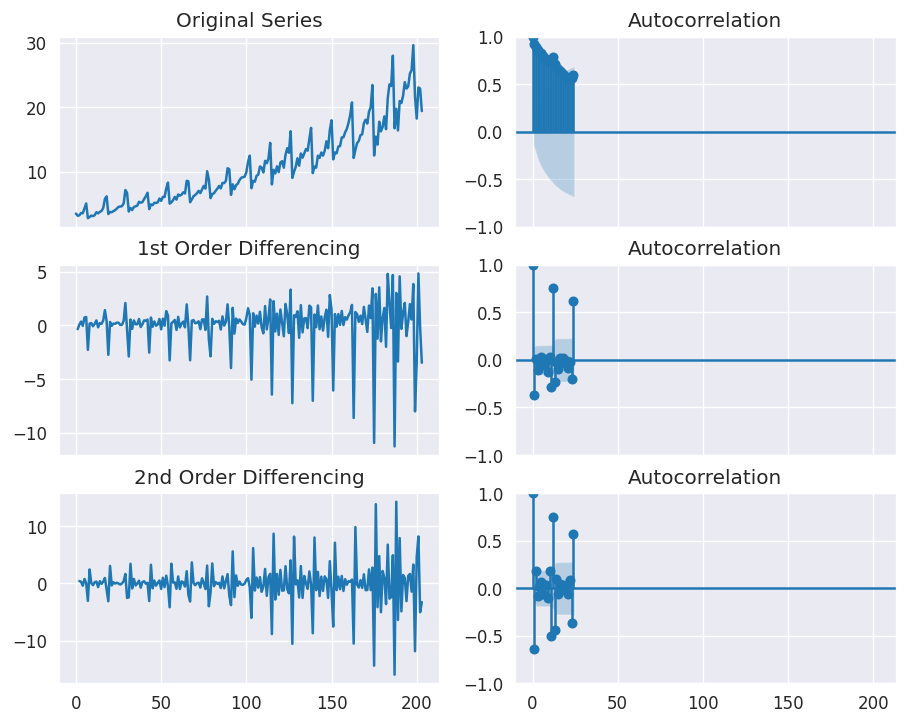

In [65]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df["value"]); axes[0, 0].set_title('Original Series')
plot_acf(df["value"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df["value"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["value"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df["value"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df["value"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Ici, deux différenciations permettent de rendre la série temporelle stationnaire. On vérifie cependant ce résultat.

In [66]:
result = adfuller(df["value"].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.292305
p-value: 0.000000


Ici la $p$-value valide l'hypothèse émise $\mathcal{H}_0$ ($p$-value nulle) et la valeur statistique est éloignée de la valeur critique, la série est bien stationnaire. 

* **On prend donc $d=2$**

#### 2.4 Réglage de l'hyperparamètre $p$ et $q$

##### Focntions d'autocorrélation et d'autocorrélation partielle. 

Les fonctions ACF et PACF permettent de mettre en valeur l'influence des lags sur la série $X_t$, i.e. les corrélations entre $X_t$ et $X_{t-k}$ (décalages temporels). Autrement dit :

$$
\text{lag}_k(X) = X_{t-k}, \quad k < t
$$

L'ACF évalue la corrélation entre les lags $k$ en prenant en compte les lags intermédiaires tandis que la PACF évalue la corrélation entre $X_t$ et son $k$-ième lag sans prendre en compte les lags intermédiaires.

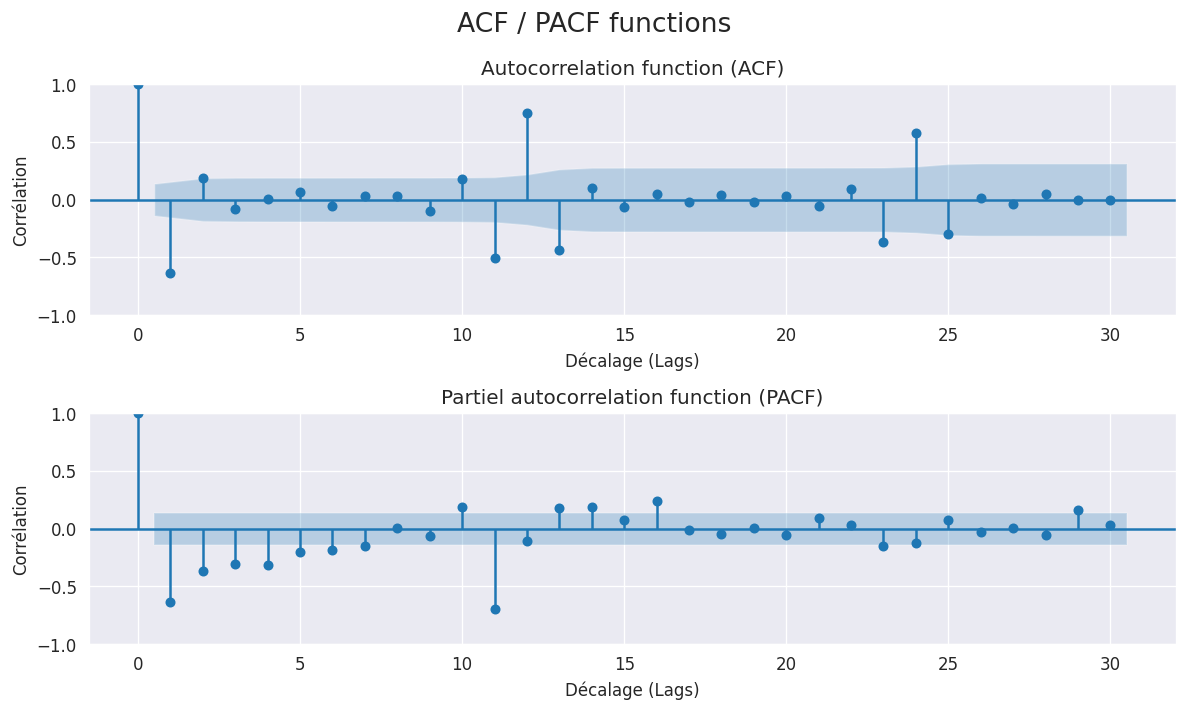

In [67]:
target = 'value'
__df__ = df[target].diff().diff().dropna() # Deux différenciations


fig, axes = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle("ACF / PACF functions", fontsize=16)

plot_acf(
    __df__,
    lags=30,
    ax=axes[0]
)

axes[0].set_title('Autocorrelation function (ACF)')
axes[0].set_xlabel('Décalage (Lags)')
axes[0].set_ylabel('Corrélation')

plot_pacf(
    __df__,
    lags=30,
    ax=axes[1]
)

axes[1].set_title('Partiel autocorrelation function (PACF)')
axes[1].set_xlabel('Décalage (Lags)')
axes[1].set_ylabel('Corrélation')

plt.tight_layout()
plt.show()

On remarque que pour les deux fonction (ACF et PACF), le lag 1 est significatif et négatif ($\approx$ -0.55), ce qui veut dire qu'il existe une corrélation non significative entre la valeur à l'instant $t$ et la valeur à l'instant $t-1$. Par exemple, si la série temporelle augmente à un instant $t$, elle a tendance à diminuer 1 périodes plus tard.

* **Pour le terme AR, on considère uniquement la PACF. On prend donc $p=1$.** 
* **Pour le terme MA, on considère uniquement l'ACF. On prend donc $q=1$.**

#### 2.5 Séparation $X_{\text{train}}$, $X_{\text{test}}$ 

In [68]:
test_size = 0.2                    # 20% of data for training
n_test = int(len(df) * test_size)  # Test lenght

train, test = df[target][:-n_test], df[target][-n_test:] # Split

#### 2.6 Entraînement et prédictions

##### Cross validation

In [71]:
tscv = TimeSeriesSplit(n_splits=5)
metrics_cv = []

for train_index, test_index in tqdm(tscv.split(df)):
    train_cv, test_cv = df['value'].iloc[train_index], df['value'].iloc[test_index]
    
    model = ARIMA(train, order=(1,2,1)).fit()
    
    pred_cv = model_cv.get_prediction(start=test_index[0], end=test_index[-1])
    forecast_cv = pred_cv.predicted_mean
    
    rmse_cv = np.sqrt(mean_squared_error(test_cv, forecast_cv))
    mae_cv = mean_absolute_error(test_cv, forecast_cv)
    
    metrics_cv.append({'RMSE': rmse_cv, 'MAE': mae_cv})

pd.DataFrame(metrics_cv)

5it [00:00, 16.84it/s]


,RMSE,MAE
0,0.445144,0.307539
1,0.356210,0.278447
2,0.687637,0.541518
3,0.879295,0.685209
4,2.379004,1.977574


In [73]:
model = ARIMA(df[target], order=(1,2,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -438.108
Date:                Wed, 10 Dec 2025   AIC                            882.216
Time:                        16:57:06   BIC                            892.141
Sample:                             0   HQIC                           886.232
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3649      0.054     -6.779      0.000      -0.470      -0.259
ma.L1         -0.9999      2.712     -0.369      0.712      -6.316       4.316
sigma2         4.3486     11.949      0.364      0.716     -19.071      27.769
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               473.67
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               8.88   Skew:                            -2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 2.7 Résidus

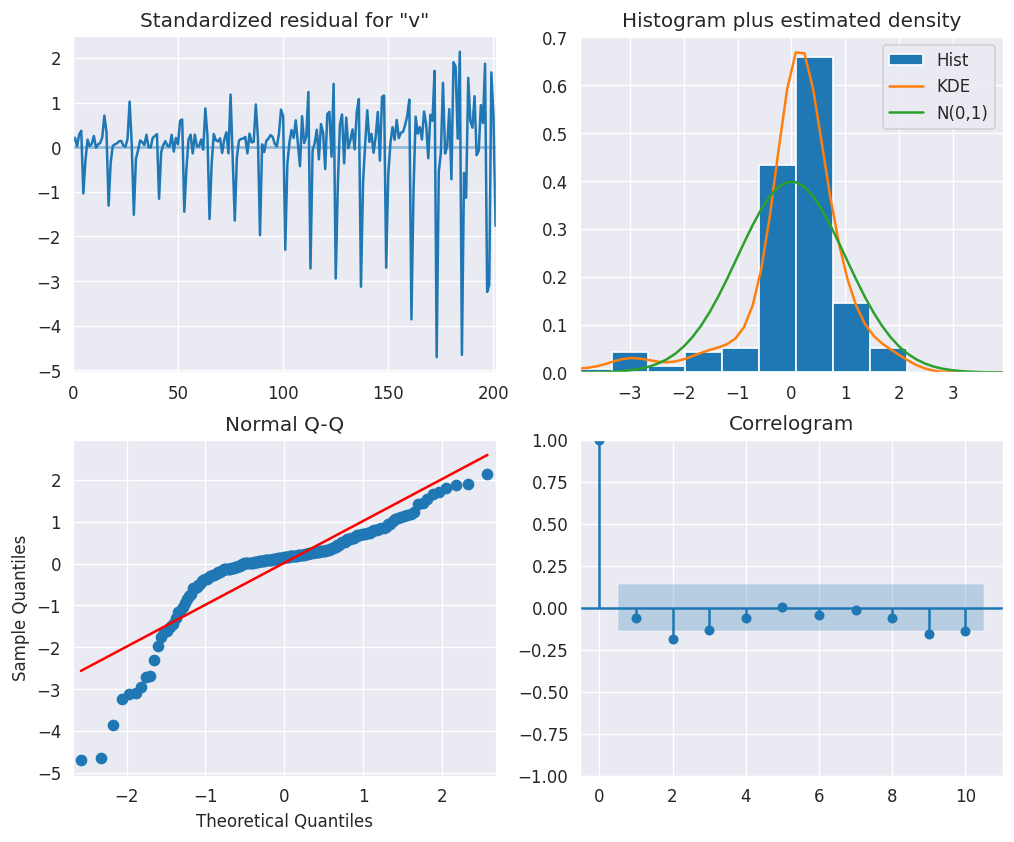

In [74]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

* **Standadized residuals** : si la moyenne des résidus est égale à zéro, alors la variance a une distribution uniforme. La série est bien homoscédastique.

* **Histogramme** : l'histogramme et le KDE suggèrent une densité semblable à une densité de loi normale avec une moyenne proche de 0 et de variance faible.

* **Theoritical Quantiles** : plus la courbe blueue ressemble à la droite rouge, meilleur est le modèle

* **Correlogram** : le corrélogramme montre que les résidus sont indépendants entre eux.

#### 2.8 Prédictions sur les valeurs connues

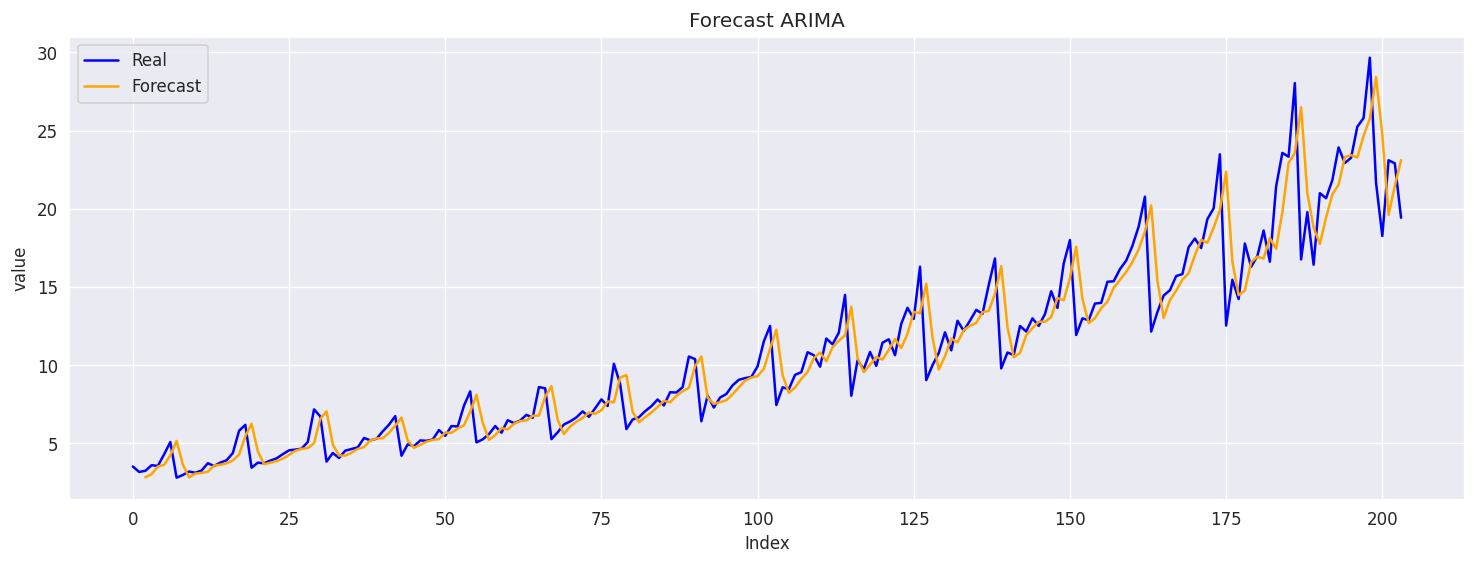

In [76]:
pred_in_sample = model.predict(start=2, end=len(df)-1) 

# Plot
plt.figure(figsize=(15,5))
plt.plot(df[target], label='Real', color='blue')
plt.plot(pred_in_sample, label='Forecast', color='orange')
plt.title('Forecast ARIMA')
plt.xlabel('Index')
plt.ylabel(target)
plt.legend()
plt.show()

#### 2.9 Prédictions sur les valeurs futures (ARIMA)

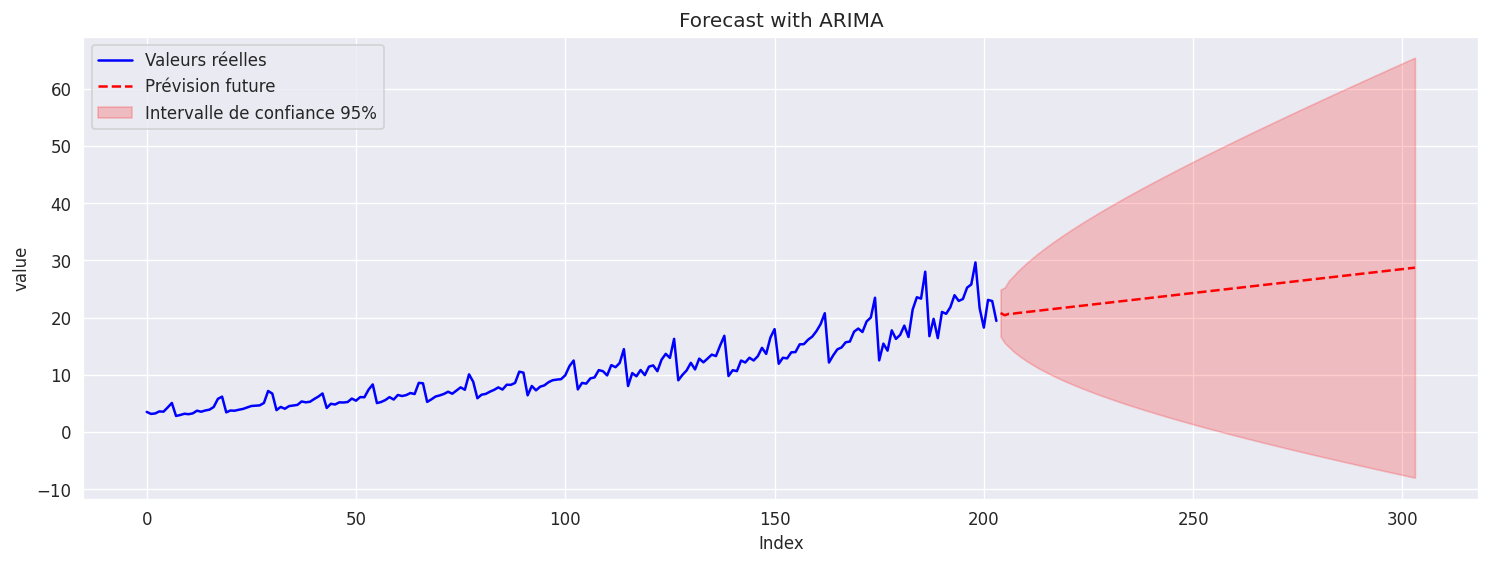

In [77]:
steps = 100
forecast_index = np.arange(len(df), len(df) + steps)

pred = model.get_prediction(start=len(df), end=len(df)+steps-1)
forecast_values = pred.predicted_mean
conf_int = pred.conf_int(alpha=0.05)  # IC 95%
lower = conf_int.iloc[:, 0]
upper = conf_int.iloc[:, 1]

# Tracé
plt.figure(figsize=(15,5))
plt.plot(df[target], label='Valeurs réelles', color='blue')
plt.plot(forecast_index, forecast_values, label='Prévision future', color='red', linestyle='--')
plt.fill_between(forecast_index, lower, upper, color='red', alpha=0.2, label='Intervalle de confiance 95%')
plt.title('Forecast with ARIMA')
plt.xlabel('Index')
plt.ylabel(target)
plt.legend()
plt.show()

#### 2.10 Auto ARIMA 

In [78]:
data = pd.read_csv('src/data/dataset_sarimax.csv', parse_dates=['date'], index_col='date')

smodel = pm.auto_arima(
       data,
       start_p=1,
       start_q=1,
       d=2,
       start_P=0,
       start_Q=0,
       D=2,
       max_p=3, 
       max_q=3,
       max_d=3,
       max_P=3,
       max_Q=3,
       max_D=3,
       test='adf',
       m=12,
       seasonal=True,
       trace=True,
       error_action='ignore',  
       suppress_warnings=True, 
       #stepwise=True
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,2,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=931.393, Time=0.03 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=764.916, Time=0.13 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=808.927, Time=0.06 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=736.676, Time=0.39 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=732.781, Time=0.81 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=4.63 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=2.59 sec
 ARIMA(0,2,0)(3,2,0)[12]             : AIC=879.413, Time=0.72 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=648.863, Time=1.65 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=660.565, Time=0.50 sec
 ARIMA(2,2,0)(3,2,1)[12]             : AIC=inf, Time=5.00 sec
 ARIMA(2,2,0)(2,2,1)[12]             : AIC=inf, Time=2.53 sec
 ARIMA(3,2,0)(3,2,0)[12]             : AIC=632.452, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(3, 2, 0)x(3, 2, 0, 12)   Log Likelihood                -309.226
Date:                            Wed, 10 Dec 2025   AIC                            632.452
Time:                                    17:11:09   BIC                            654.725
Sample:                                07-01-1991   HQIC                           641.485
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5358      0.053    -28.986      0.000      -1.640      -1.432
ar.L2         -1.1701      0.090    -12.982      0.000      -1.347      -0.993
ar.L3         -0.3756      0.069     -5.442      0.000      -0.511      -0.240
ar.S.L12      -1.2823      0.070    -18.426      0.000      -1.419      -1.146
ar.S.L24      -1.0603      0.108     -9.860      0.000      -1.271      -0.850
ar.S.L36      -0.4563      0.090     -5.086      0.000      -0.632      -0.280
sigma2         1.6175      0.118     13.718      0.000       1.386       1.849
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):               109.97
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):              12.56   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto ARIMA choisi un ARIMA ou un SARIMA en fonction du problème proposé. C'est pour cela que l'on peut avoir un modèle avec soit 3 hyperparamètres ou 7. Comme nous avons pu le voir avec le réglage manuel, le modèle ARIMA capte correctement la tendance mais n'arrive pas à capter la saisonnalité. C'est pourquoi un modèle SARIMA est utilisé à la place.

### 3 SARIMAX

#### 3.1 Différenciation saisonnière

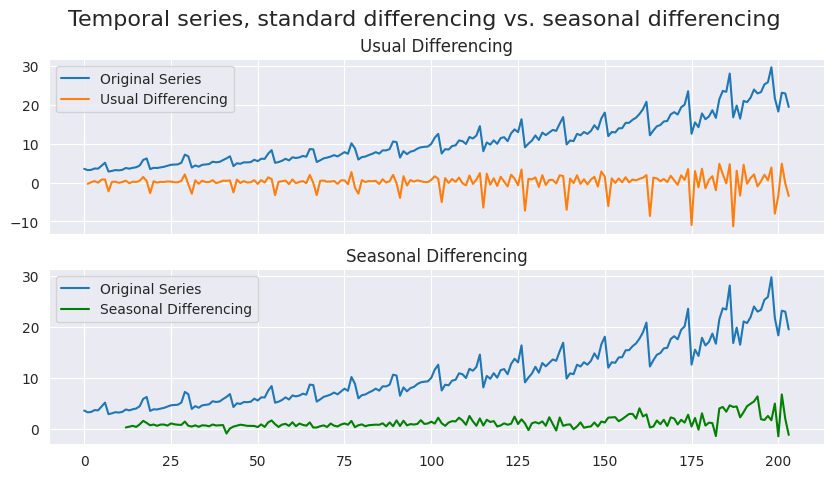

In [79]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df['value'], label='Original Series')
axes[0].plot(df['value'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(df['value'], label='Original Series')
axes[1].plot(df['value'].diff(12), label='Seasonal Differencing', color='green') # Season
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Temporal series, standard differencing vs. seasonal differencing', fontsize=16)
plt.show()

#### 3.2 Réglage des hyperparamètres $p$, $q$, $d$, $P$, $Q$ et $D$

**L'ADF test n'est pas conçu pour gérer les composantes saisonnières. La $p$-value est donc caduque dans ce cas de figures. Pour déterminer $d$ et $D$, il faut vérifier que les lags significatifs pour l'ACF et la PACF affichent le lag 12 disparaisse après un certain nombre de différenciations.** Cependant, graphiquement on constate que $d$ et $D$ doivent êtres égaux à 1. 

Pour déterminer $p$ et $q$, on différencie assez jusqu'à faire disparaître les pics de l'ACF et de la PACF qui correspondent à la saisonnalité. Par exmeple, sans différencier, on aura un pic au lag 12 car $s = 12$. Le nombre de différenciations donne la valeur de $D$ : on regarde l'écart entre l'ACF et PACF avant et après différenciation avec la composanten saisonnière (df.diff(12)). Le lag qui représente la saisonnalité (ici 12) doit disparaître après un certain nombre de différenciations.

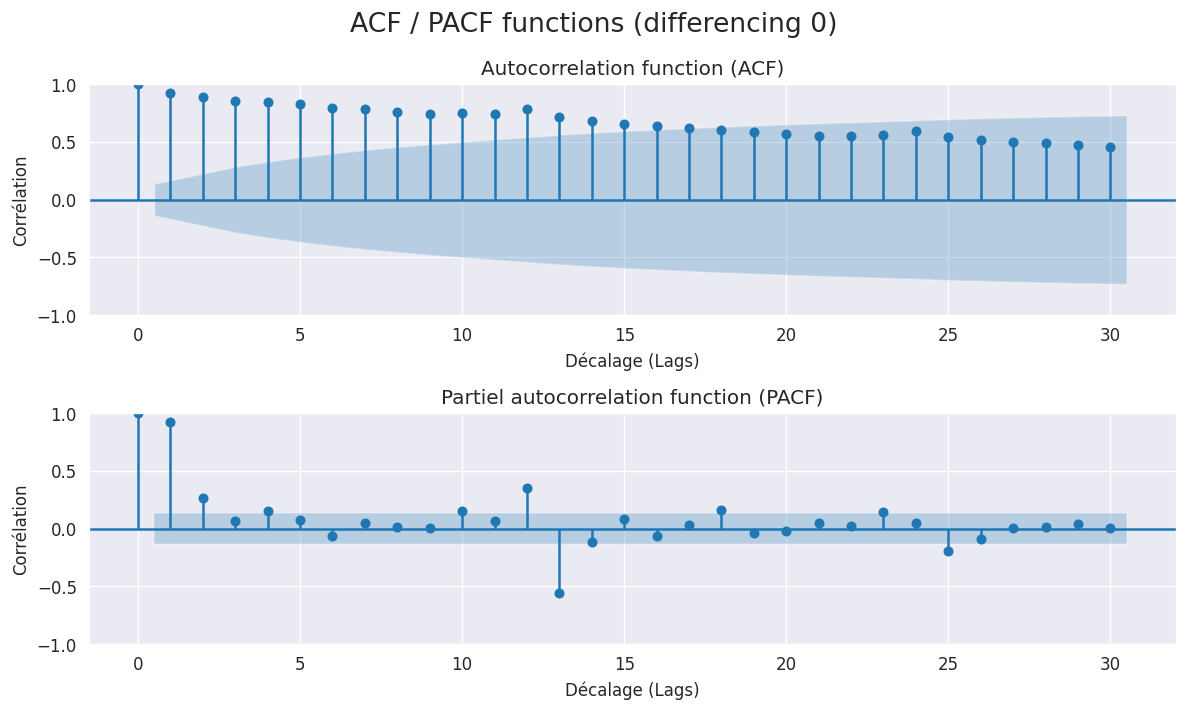

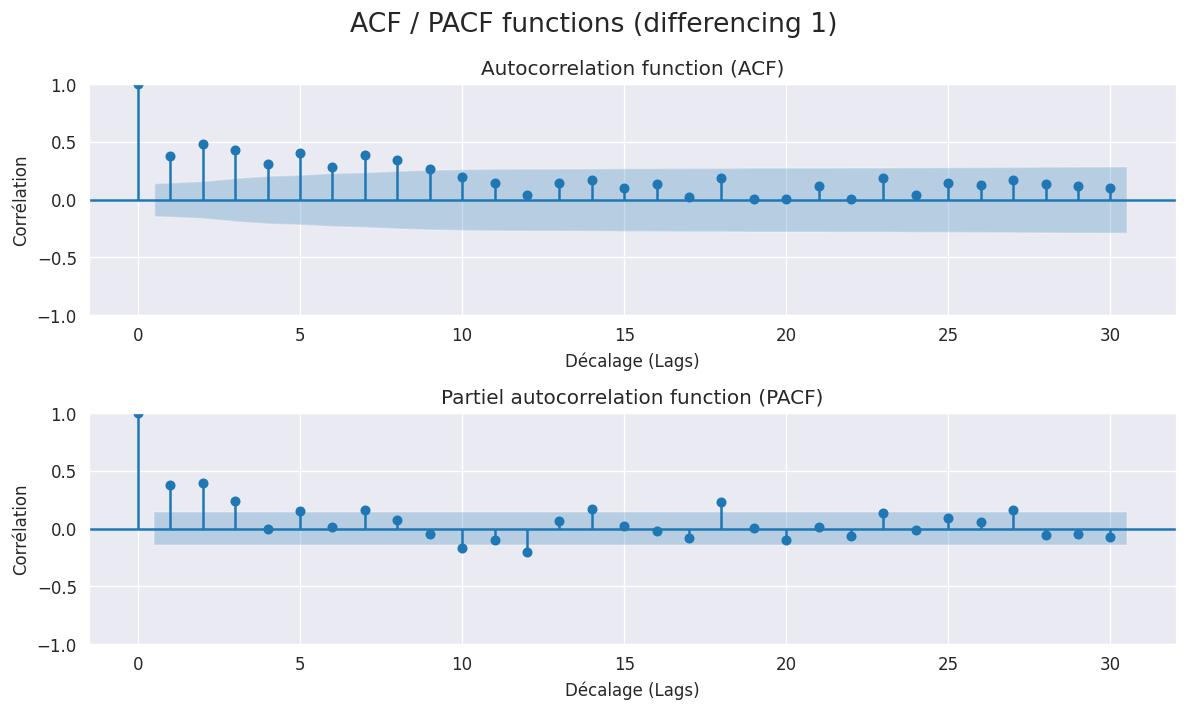

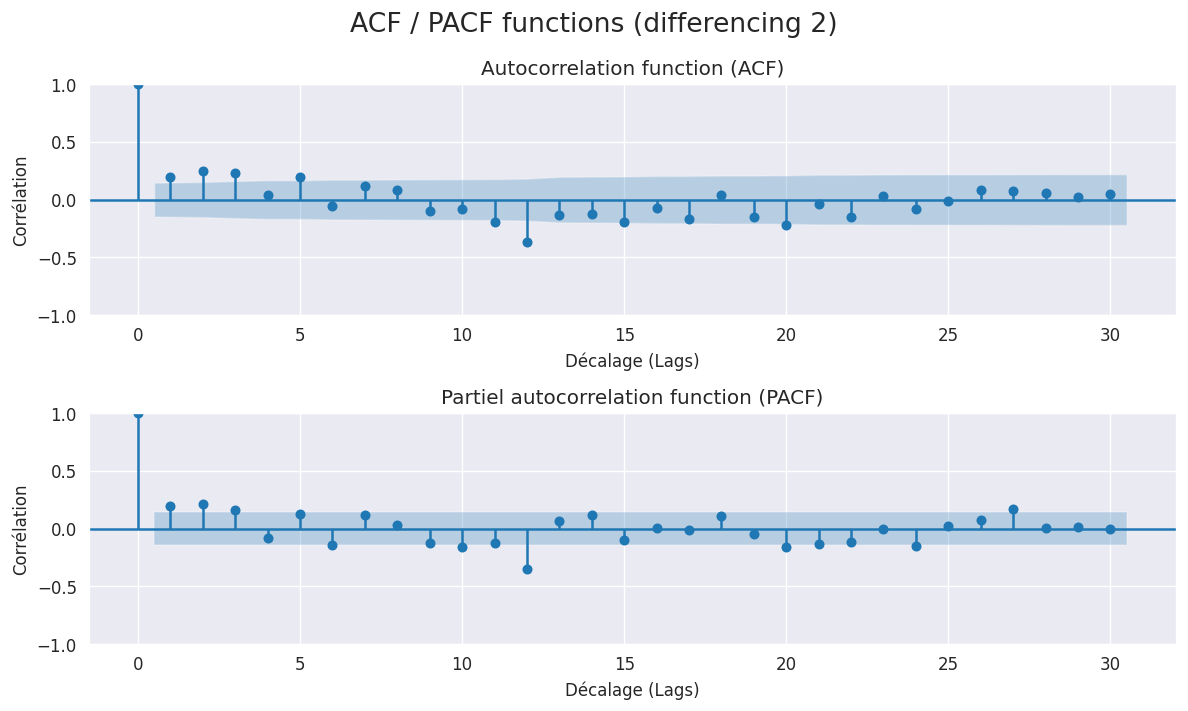

In [80]:
__df__0 = df[target].dropna() # Deux différenciations
__df__1 = df[target].diff(12).dropna()
__df__2 = df[target].diff(12).diff(12).dropna()

__dfs__ = [__df__0, __df__1, __df__2]
for i, __df__ in zip(range(len(__dfs__)), __dfs__):
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    fig.suptitle(f"ACF / PACF functions (differencing {i})", fontsize=16)
    
    plot_acf(
        __df__,
        lags=30,
        ax=axes[0]
    )
    
    axes[0].set_title('Autocorrelation function (ACF)')
    axes[0].set_xlabel('Décalage (Lags)')
    axes[0].set_ylabel('Corrélation')
    
    plot_pacf(
        __df__,
        lags=30,
        ax=axes[1]
    )
    
    axes[1].set_title('Partiel autocorrelation function (PACF)')
    axes[1].set_xlabel('Décalage (Lags)')
    axes[1].set_ylabel('Corrélation')
    
    plt.tight_layout()
    plt.show()

* Le lag significatif (12) disparaît après une différenciation, on prend $D = d = 1$.
* Les lags disparaissent, ce qui veut dire qu'il n'y a pas d'effets supplémentaires avec la saisonnalité $\implies$ on prend $P = Q = 0$.
* Bien que pour la série différenciée sans la composante saisonnière, on a le lag significatif 1 qui indique que $p = q = 1$, la différenciation avec composante saisonnière montre que les lags 1 et 2 sont quasiments de même valeur pour l'ACF et la PACF. On testera donc pour les configurations quivantes : $p = q = 1$ ou $p = q = 2$. Les autres hyperparamètres restent inchangés : $D = d= 0$ et $P = Q = 0$. 

#### 3.3 Métriques

Comme évoqué précédement, on hésite entre $p = q = 1$ ou $p = q = 2$. Il y a peu de différences visuellement, on reagde donc les performances à l'aide des métriques définies dans la partie I.

In [81]:
def evaluate_model(model, data):
    # Init
    pred = model.predict(start=0, end=len(data)-1)
    residuals = data - pred # Résidus
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(data, pred)) # RMSE
    mae = mean_absolute_error(data, pred)          # MAE
    mape = np.mean(np.abs(residuals / data)) * 100 # MAPE
    acf1 = residuals.autocorr(lag=1)               # ACF1
    aic = model.aic                                # AIC
    bic = model.bic                                # BIC
    
    return {"RMSE": rmse, "MAE": mae, "MAPE": mape, "ACF1": acf1, "AIC": aic, "BIC": bic}

# p=q=1
model1 = ARIMA(df['value'], order=(1,1,1)).fit()
metrics1 = evaluate_model(model1, df['value'])

# p=q=2
model2 = ARIMA(df['value'], order=(2,1,2)).fit()
metrics2 = evaluate_model(model2, df['value'])

pd.DataFrame([metrics1, metrics2], index=['ARIMA(1,1,1)', 'ARIMA(2,1,2)'])

,RMSE,MAE,MAPE,ACF1,AIC,BIC
"ARIMA(1,1,1)",1.968662,1.315020,12.455162,-0.062185,855.523629,865.463247
"ARIMA(2,1,2)",1.910784,1.272987,12.106030,-0.038462,848.004004,864.570034


Finalement, on prend $p = q = 2$

#### 3.4 Entraînement

In [82]:
modelX = SARIMAX(
    df['value'],
    order=(2,1,2),
    seasonal_order=(0, 1, 0, 12),
    trend="c"
).fit(disp=False)
modelX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               value   No. Observations:                  204
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                -270.865
Date:                             Wed, 10 Dec 2025   AIC                            553.730
Time:                                     17:11:10   BIC                            573.243
Sample:                                          0   HQIC                           561.634
                                             - 204                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0187      0.059      0.316      0.752      -0.098       0.135
ar.L1         -1.2043      0.045    -26.691      0.000      -1.293      -1.116
ar.L2         -0.3707      0.052     -7.157      0.000      -0.472      -0.269
ma.L1          0.3124      0.058      5.376      0.000       0.198       0.426
ma.L2         -0.5352      0.062     -8.643      0.000      -0.657      -0.414
sigma2         0.9922      0.061     16.313      0.000       0.873       1.111
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               150.25
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              15.10   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prédictions sur les valeurs connues (SARIMAX)

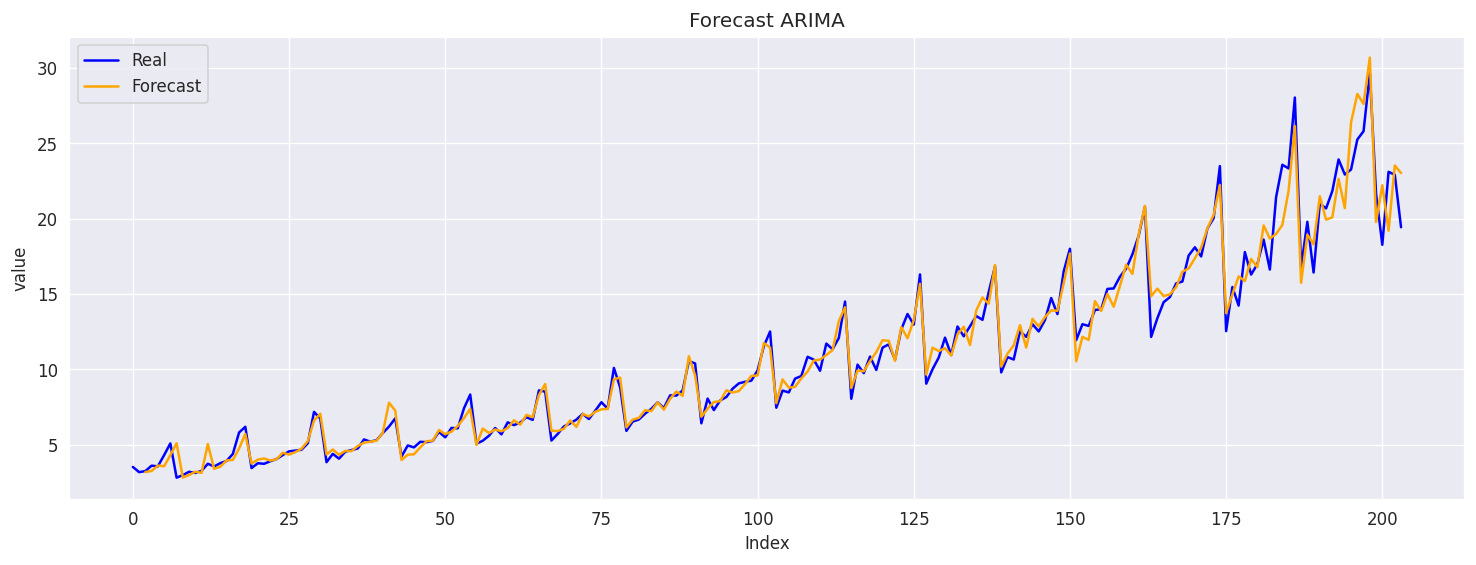

In [83]:
pred_in_sample = modelX.predict(start=2, end=len(df)-1) 

# Plot
plt.figure(figsize=(15,5))
plt.plot(df[target], label='Real', color='blue')
plt.plot(pred_in_sample, label='Forecast', color='orange')
plt.title('Forecast ARIMA')
plt.xlabel('Index')
plt.ylabel(target)
plt.legend()
plt.show()

#### Prédictions sur les valeurs futures (SARIMAX)

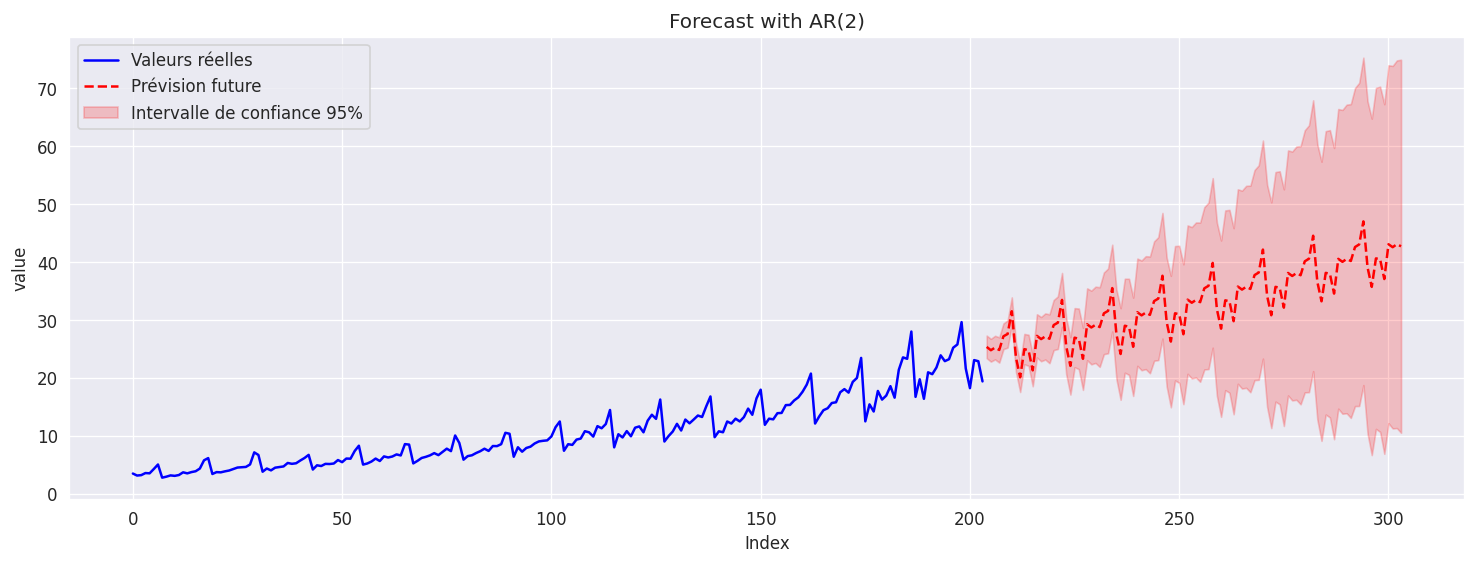

In [84]:
steps = 100
forecast_index = np.arange(len(df), len(df) + steps)

pred = modelX.get_prediction(start=len(df), end=len(df)+steps-1)
forecast_values = pred.predicted_mean
conf_int = pred.conf_int(alpha=0.05)  # IC 95%
lower = conf_int.iloc[:, 0]
upper = conf_int.iloc[:, 1]

# Tracé
plt.figure(figsize=(15,5))
plt.plot(df[target], label='Valeurs réelles', color='blue')
plt.plot(forecast_index, forecast_values, label='Prévision future', color='red', linestyle='--')
plt.fill_between(forecast_index, lower, upper, color='red', alpha=0.2, label='Intervalle de confiance 95%')
plt.title('Forecast with AR(2)')
plt.xlabel('Index')
plt.ylabel(target)
plt.legend()
plt.show()

### 4. Forecast avec composantes exogènes

# VARMAX
---

In [1]:
!jupyter nbconvert --to script 8.SARIMAX.ipynb

[NbConvertApp] Converting notebook 8.SARIMAX.ipynb to script
[NbConvertApp] Writing 24900 bytes to 8.SARIMAX.py
